# Labor 1 Sprachsignale plotten, laden und erzeugen

## Imports

### Erklärung der Biblioteken 

  numpy 
 - kurz für "Numerical Python" bietet N-Dimensionale Arrays und  Mathematische Funktionen 

 scipy.io.wavfile
 - ein Modul in der SciPy-Bibliothek das speziell für das Arbeiten mit WAV-Dateien entwickelt wurde. Das Modul bietet Funktionen zum Lesen und Schreiben von WAV-Dateien.

 matplotlib.pyplot 
 - ein Modul in der Matplotlib-Bibliothek ist Werkzeug zum Erstellen und Anpassen von Diagrammen und Grafiken. 

 IPython.display 
 - ein Modul in IPython die es ermöglicht, verschiedene Daten und Medien in Notebooks anzuzeigen. 

In [1774]:
import numpy as np
import scipy.io.wavfile as wavfile
import matplotlib.pyplot as plt
import IPython.display as ipd 

## Erzeugen Sie eine Audio-Datei auf ihrem PC mit folgendem Inhalt: "Dies ist eine Suchmaschine".

- Verwenden Sie als Abtastrate 𝑓𝑎 = 16𝑘𝐻𝑧. 
- Erstellen Sie anschliessend ein Jupyter-Notebook das die erstellte Audio-Datei lädt, abspielt und das Sprachsignal als Funktion der Zeit plottet. 
- Können Sie im geplotteten Sprachsignal Teile ihres Satzes wieder erkennen? Analysieren Sie ihr Sprachsignal schrittweise und beschreiben Sie ihr Ergebnis textuell.

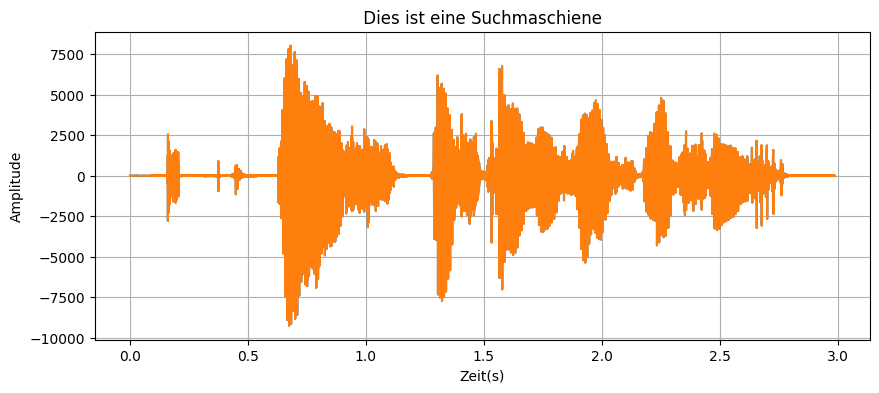

In [1775]:
#Laden der Audiodatei 
audio_path = 'suchmaschine.wav' #Pfad zur Audiodatei 
rate , signal = wavfile.read(audio_path) #Einlesen der Audiodatei 

#Zeitvektor 
t = np.arange(0, len(signal)) / rate 

# Ploten der Audiodatei 
plt.figure(figsize=(10,4))
plt.plot(t,signal)
plt.xlabel("Zeit(s)")
plt.ylabel("Amplitude")
plt.title(" Dies ist eine Suchmaschiene ")
plt.grid(True)
plt.show()

# Audio-Datei abspielen
ipd.Audio(audio_path)

#### Analyse 
Anhand der Auschläge der Grafik kann kann man die Einzelnen wörter und Pausen des Satzes erkennen und sogar in unseren fall das Hintergrundgeräusch am Anfang der Aufnahme. Man erkennt im ersten Großen Block das Wort "Dies" ganz deutlich und auch die Lautstärke der Stimme die im laufe des Satzes abnimmt erkennt man dadurch das die Auschläge nicht so groß sind wie am Anfang. Ebenfalls kann man die einzelnen Silben des Satzes Sehen. 

## Generieren Sie jetzt ein harmonisches Signal bestehend aus dem Kammerton (𝑓0=440Hz) und seiner 2. und 3. Harmonischen. 

- Die Amplitude a und die Zeitdauer 𝑡𝑑 seien gegeben durch:  a= 1.0 und  𝑡𝑑=1s. 
- Tasten Sie das erstellte Signal mit einer Abtastfrequenz fa = 20 ∗ f0 ab und speichern Sie es in einer wave-Audiodatei ab. 
- Plotten Sie das resultierende Oszillogramm und den Kammerton. 
- Lesen Sie die Audio-Datei ein und geben Sie den Klang aus. 

In [1776]:
# Parameter
a = 1.0  # Amplitude
td = 1.0  # Zeitdauer in Sekunden
f0 = 440  # Grundfrequenz in Hz
fa = 20 * f0  # Abtastfrequenz in Hz

# Zeitvektor
t = np.linspace(0, td, int(td * fa), endpoint=False)

#Generierung der Harmonischen 
def harmonic_generator(k , t ):
    return a * np.sin(2 * np.pi * k * f0 * t)


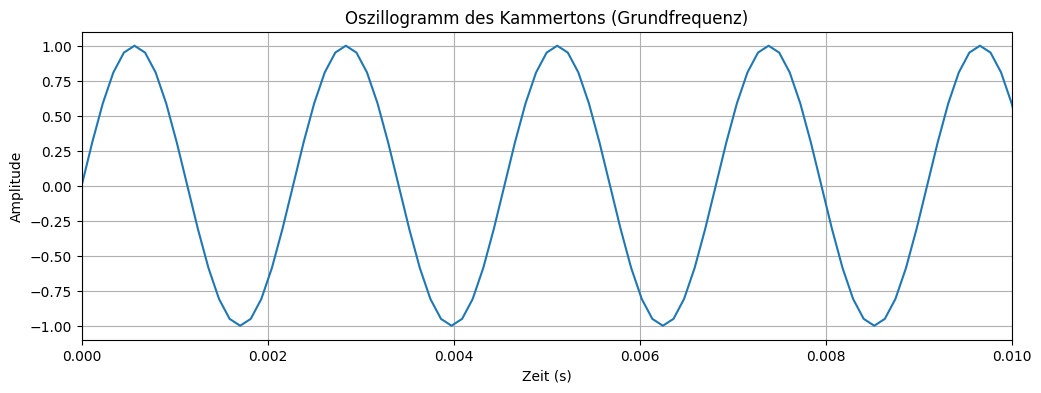

Klang des Kammertons


In [1777]:
# Generierung des Kammertons
chambertone = harmonic_generator(1, t)

# Plot des Kammertons (nur die Grundfrequenz)
plt.figure(figsize=(12, 4))
plt.plot(t, chambertone)
plt.xlim(0,0.01)
plt.title('Oszillogramm des Kammertons (Grundfrequenz)')
plt.xlabel('Zeit (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Abspielen des Kammertons 
print("Klang des Kammertons")
ipd.display(ipd.Audio(chambertone, rate=fa))

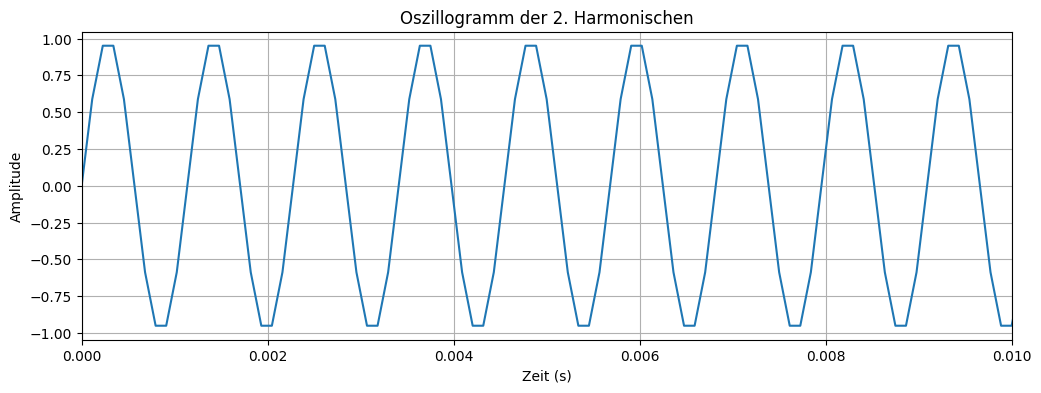

Klang der 2.Harmonischen


In [1778]:
# Generierung der 2. Harmonischen
second_harmonic = harmonic_generator(2 , t )

# Plot der 2. Harmonischen
plt.figure(figsize=(12, 4))
plt.plot(t, second_harmonic)
plt.xlim(0,0.01)
plt.title('Oszillogramm der 2. Harmonischen')
plt.xlabel('Zeit (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Abspielen der 2. Harmonischen 
print("Klang der 2.Harmonischen")
ipd.display(ipd.Audio(second_harmonic, rate=fa))

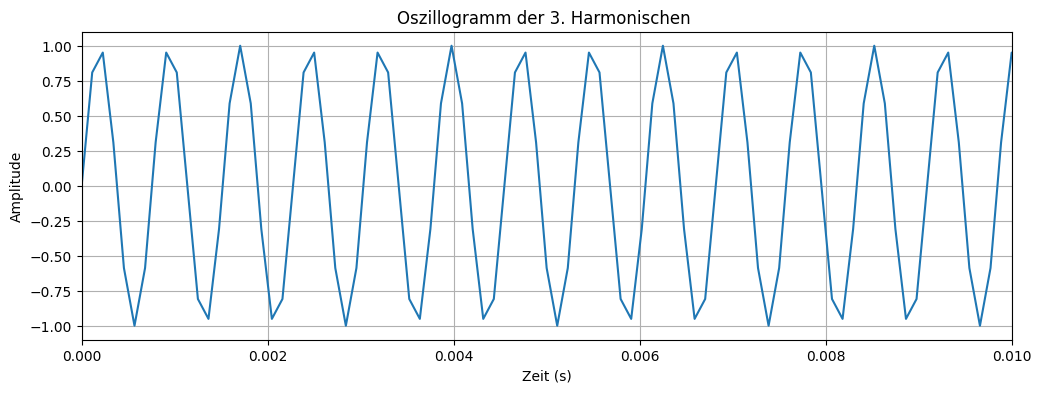

Klang der 3.Harmonischen


In [1779]:
# Generierung der 3. Harmonischen
third_harmonic = harmonic_generator(3 , t)

# Plot der 3. Harmonischen
plt.figure(figsize=(12, 4))
plt.plot(t, third_harmonic)
plt.xlim(0,0.01)
plt.title('Oszillogramm der 3. Harmonischen ')
plt.xlabel('Zeit (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Abspielen der 3.Harmonischen 
print("Klang der 3.Harmonischen")
ipd.display(ipd.Audio(third_harmonic, rate=fa))

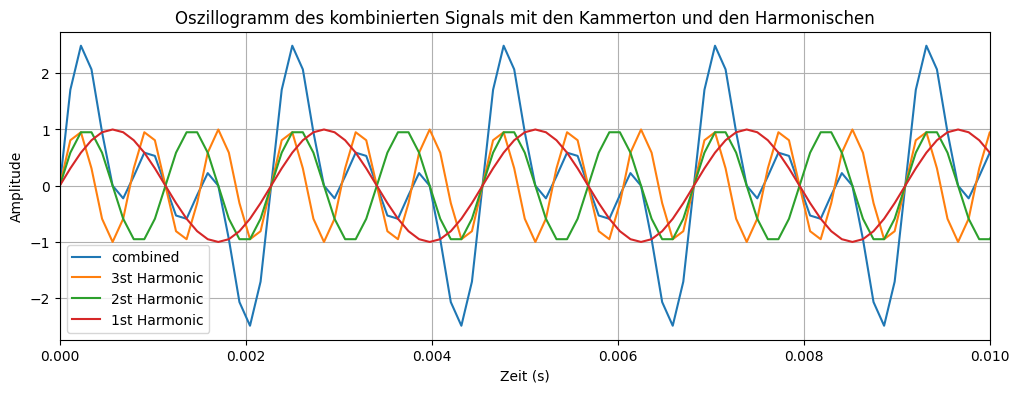

Klang des combinierten Signals


In [1780]:
# Summierung der harmonischen Signale
combined_signal = chambertone + second_harmonic + third_harmonic

# Speichern des Signals in einer Wave-Datei
wavfile.write('harmonisches_signal.wav', fa, combined_signal.astype(np.float32))

# Plot des Oszillogramms des kombinierten Signals mit den Kammerton und den Harmonischen
plt.figure(figsize=(12, 4))
plt.plot(t, combined_signal, label="combined")
plt.plot(t, third_harmonic, label="3st Harmonic")
plt.plot(t, second_harmonic, label="2st Harmonic")
plt.plot(t, chambertone, label="1st Harmonic")
plt.xlim(0,0.01)
plt.title('Oszillogramm des kombinierten Signals mit den Kammerton und den Harmonischen')
plt.xlabel('Zeit (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

# Audio-Datei einlesen und abspielen
print("Klang des combinierten Signals")
ipd.Audio('harmonisches_signal.wav')


## Verändern Sie jetzt die Phase der drei Einzeltöne mit einer Zufallsfunktion und plotten Sie den Klang als Zeitfunktion und geben das Audiosignal aus. 

- Verändert sich der Klang sichtbar und hörbar?

In [1781]:
# Zufällige Phasenverschiebung für jede Schwingung generieren
phase_shifts = np.random.uniform(0, 2*np.pi, 3) 

# Signal mit zufälliger Phasenverschiebung erzeugen
chambertone_random_phase = harmonic_generator(1,  t+ phase_shifts[0])
second_harmonic_random_phase = harmonic_generator(2,  t + phase_shifts[1])
third_harmonic_random_phase = harmonic_generator(3, t + phase_shifts[2])


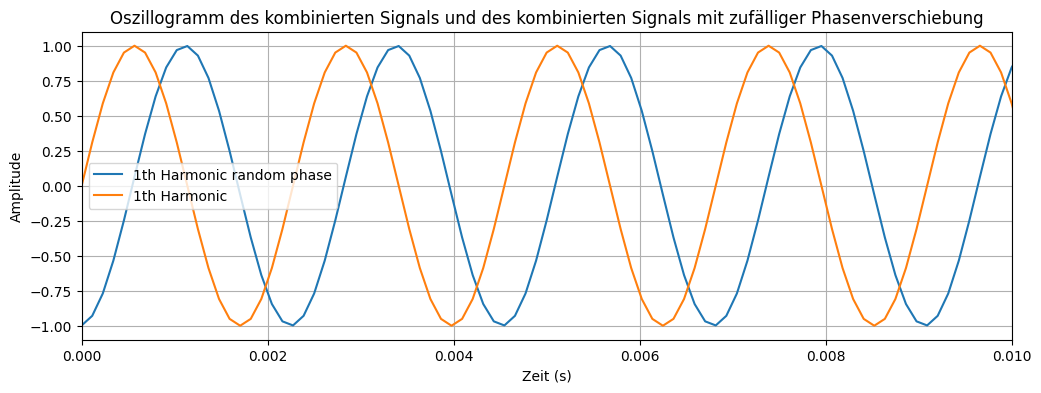

Klang des Kammertons mit zufälliger Verschiebung


Klang des Kammertons


In [1782]:
# Plot des Oszillogramms des Signals mit zufälliger Phasenverschiebung
plt.figure(figsize=(12, 4))
plt.plot(t, chambertone_random_phase, label="1th Harmonic random phase")
plt.plot(t, chambertone, label="1th Harmonic")
plt.xlim(0,0.01)
plt.title('Oszillogramm des kombinierten Signals und des kombinierten Signals mit zufälliger Phasenverschiebung')
plt.xlabel('Zeit (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()

# Abspielen des Kammertons mit zufälliger Verschiebung  
print("Klang des Kammertons mit zufälliger Verschiebung")
ipd.display(ipd.Audio(chambertone_random_phase, rate=fa))


# Abspielen des Kammertons 
print("Klang des Kammertons")
ipd.display(ipd.Audio(chambertone, rate=fa))

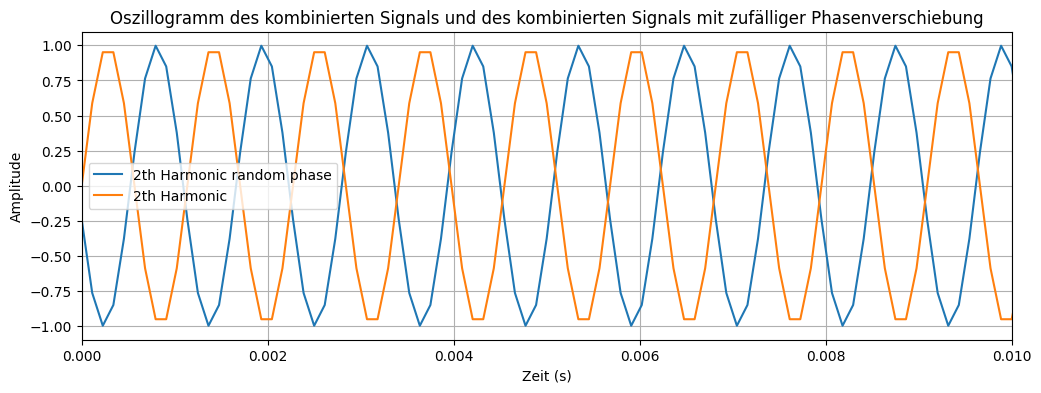

Klang der 2.Harmonischen mit zufälliger Phasenverschiebung


Klang der 2.Harmonischen


In [1783]:

# Plot des Oszillogramms des Signals mit zufälliger Phasenverschiebung
plt.figure(figsize=(12, 4))
plt.plot(t, second_harmonic_random_phase, label="2th Harmonic random phase")
plt.plot(t, second_harmonic, label="2th Harmonic")
plt.xlim(0,0.01)
plt.title('Oszillogramm des kombinierten Signals und des kombinierten Signals mit zufälliger Phasenverschiebung')
plt.xlabel('Zeit (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()

# Abspielen der 2.Harmonischen mit zufälliger Phasenverschiebung   
print("Klang der 2.Harmonischen mit zufälliger Phasenverschiebung")
ipd.display(ipd.Audio(second_harmonic_random_phase, rate=fa))


# Abspielen der 2.Harmonischen  
print("Klang der 2.Harmonischen")
ipd.display(ipd.Audio(second_harmonic, rate=fa))

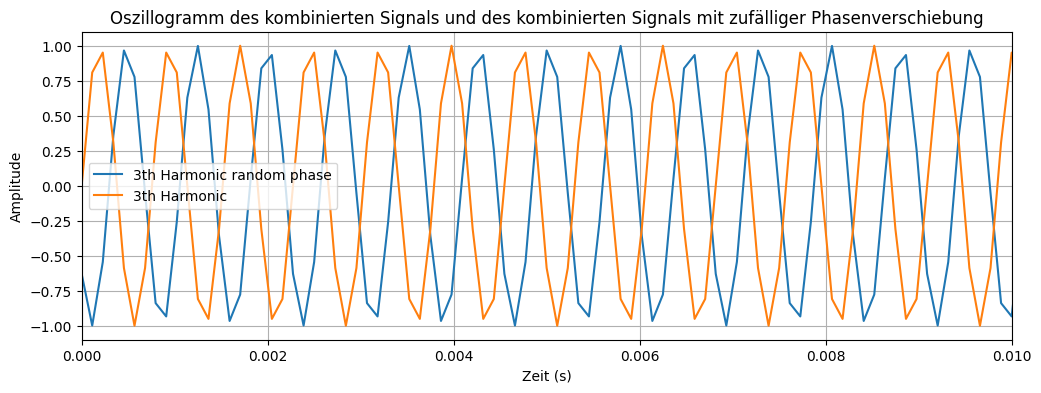

Klang der 3.Harmonischen mit zufälliger Phasenverschiebung


Klang der 3.Harmonischen


In [1784]:

# Plot des Oszillogramms des Signals mit zufälliger Phasenverschiebung
plt.figure(figsize=(12, 4))
plt.plot(t, third_harmonic_random_phase, label="3th Harmonic random phase")
plt.plot(t, third_harmonic, label="3th Harmonic")
plt.xlim(0,0.01)
plt.title('Oszillogramm des kombinierten Signals und des kombinierten Signals mit zufälliger Phasenverschiebung')
plt.xlabel('Zeit (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()

# Abspielen der 3.Harmonischen mit zufälliger Phasenverschiebung   
print("Klang der 3.Harmonischen mit zufälliger Phasenverschiebung")
ipd.display(ipd.Audio(third_harmonic_random_phase, rate=fa))


# Abspielen der 3.Harmonischen  
print("Klang der 3.Harmonischen")
ipd.display(ipd.Audio(third_harmonic, rate=fa))

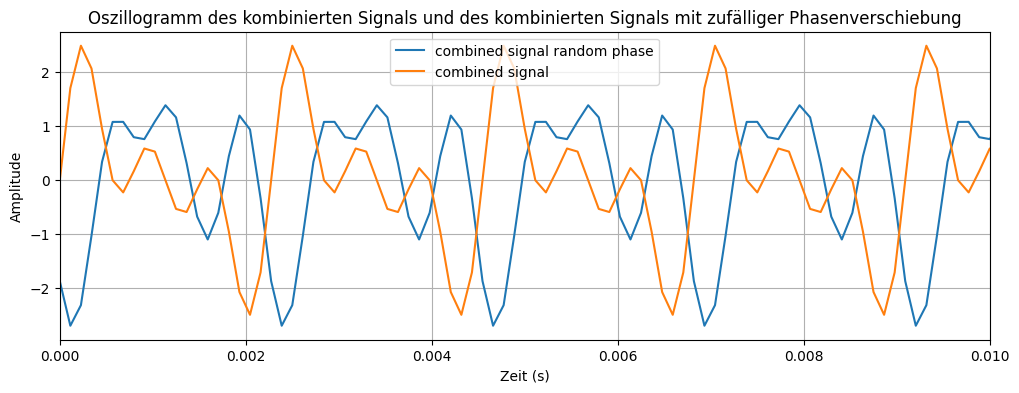

Klang des combinierten Signals mit zufälliger Phasenverschiebung


Klang des combinierten Signals


In [1785]:
# Kombiniertes Signal mit zufälliger Phasenverschiebung erstellen
combined_signal_random_phase = chambertone_random_phase + second_harmonic_random_phase + third_harmonic_random_phase

# Speichern des Signals mit zufälliger Phasenverschiebung in einer Wave-Datei
wavfile.write('harmonisches_signal_random_phase.wav', fa, combined_signal_random_phase.astype(np.float32))

# Plot des Oszillogramms des kombinierten Signals mit zufälliger Phasenverschiebung
plt.figure(figsize=(12, 4))
plt.plot(t, combined_signal_random_phase, label="combined signal random phase")
plt.plot(t, combined_signal, label="combined signal")
plt.xlim(0,0.01)
plt.title('Oszillogramm des kombinierten Signals und des kombinierten Signals mit zufälliger Phasenverschiebung')
plt.xlabel('Zeit (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()

# Abspielen des combinierten Signals zufälliger Phasenverschiebung   
print("Klang des combinierten Signals mit zufälliger Phasenverschiebung")
ipd.display(ipd.Audio(combined_signal_random_phase, rate=fa))


# Abspielen des combinierten Signals  
print("Klang des combinierten Signals")
ipd.display(ipd.Audio(combined_signal, rate=fa))


#### Analyse 
Die verschiebung der Phase kann man Deutlich im Oszillogramm sehen jedoch ist für uns der Unterschied nicht deutlich hörbar. 

## Mit welchem Schallsignal können sie den Kammerton komplett auslöschen. 

- Generieren Sie in ihrem Programm das resultierende Signal und plotten und spielen Sie dieses ab.

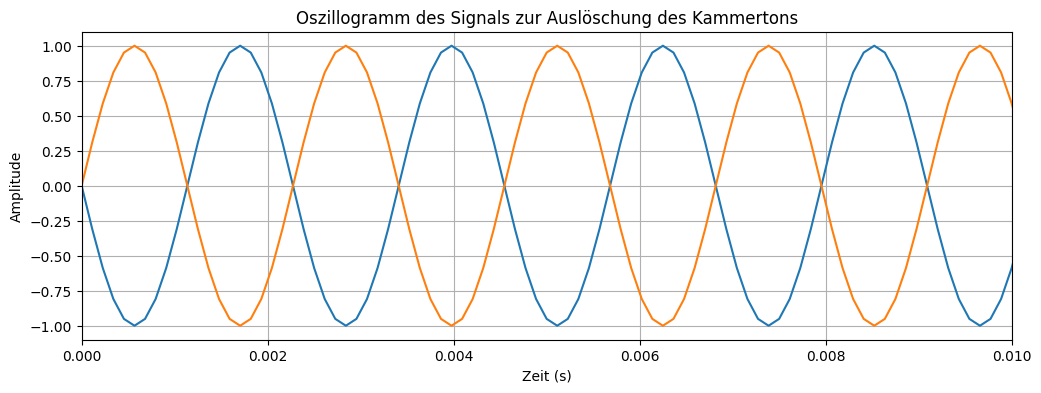

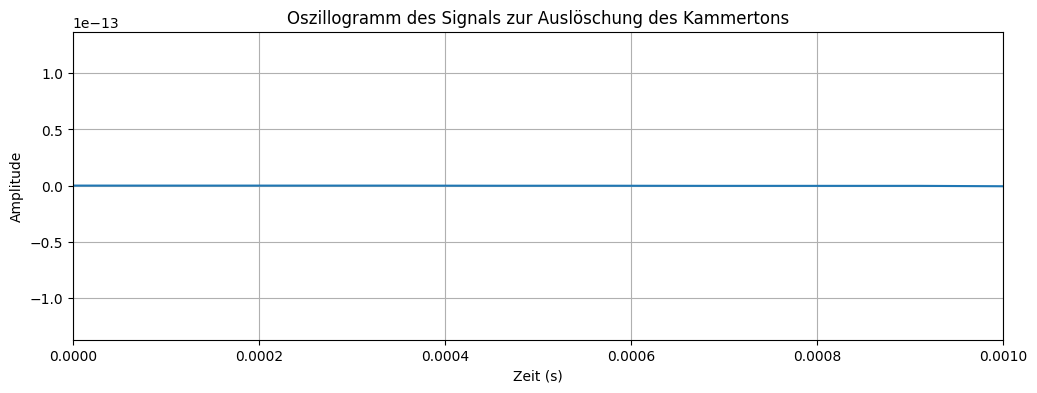

Klang des Kammertons


Klang des Auslöschungstons 


Klang des ausgelöschten Kammertons


In [1786]:
# Generierung des Signals zur Auslöschung des Kammertons
phase_shift = np.pi  # Phasenverschiebung um pi
canceling_signal = a * np.sin(2 * np.pi * f0 * t + phase_shift)

# Plot des Oszillogramms des Signals zur Auslöschung des Kammertons
plt.figure(figsize=(12, 4))
plt.plot(t, canceling_signal)
plt.plot(t, chambertone)
plt.xlim(0,0.01)
plt.title('Oszillogramm des Signals zur Auslöschung des Kammertons')
plt.xlabel('Zeit (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


chambertone_canceling_signal = chambertone + canceling_signal 

# Speichern des Signals in einer Wave-Datei
wavfile.write('kammerton_ausgeloescht.wav', fa, chambertone_canceling_signal.astype(np.float32))

# Plot des Oszillogramms des Signals zur Auslöschung des Kammertons
plt.figure(figsize=(12, 4))
plt.plot(t, chambertone_canceling_signal)
plt.xlim(0,0.001)
plt.title('Oszillogramm des Signals zur Auslöschung des Kammertons')
plt.xlabel('Zeit (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Abspielen des Kammertons 
print("Klang des Kammertons")
ipd.display(ipd.Audio(chambertone, rate=fa))

# Abspielen des Auslöschungstons  
print("Klang des Auslöschungstons ")
ipd.display(ipd.Audio(canceling_signal, rate=fa))

# Abspielen des ausgelöschten Kammertons 
print("Klang des ausgelöschten Kammertons")
ipd.Audio('kammerton_ausgeloescht.wav')


## Erstellen Sie ein Programm zur Modellierung einer periodische Rechteckfunktion (f0 =1Hz, Breite=0.5s, fa =8kHz) durch Überlagerung aus seinen ersten 9 harmonischen Komponenten.  

- Plotten Sie die so erzeugte Rechteckfunktion und zusätzlich  die 1. Harmonische und die 9. Harmonische. 
- Erklären und beschreiben Sie den Zusammenhang zwischen den 3 Funktionen. 

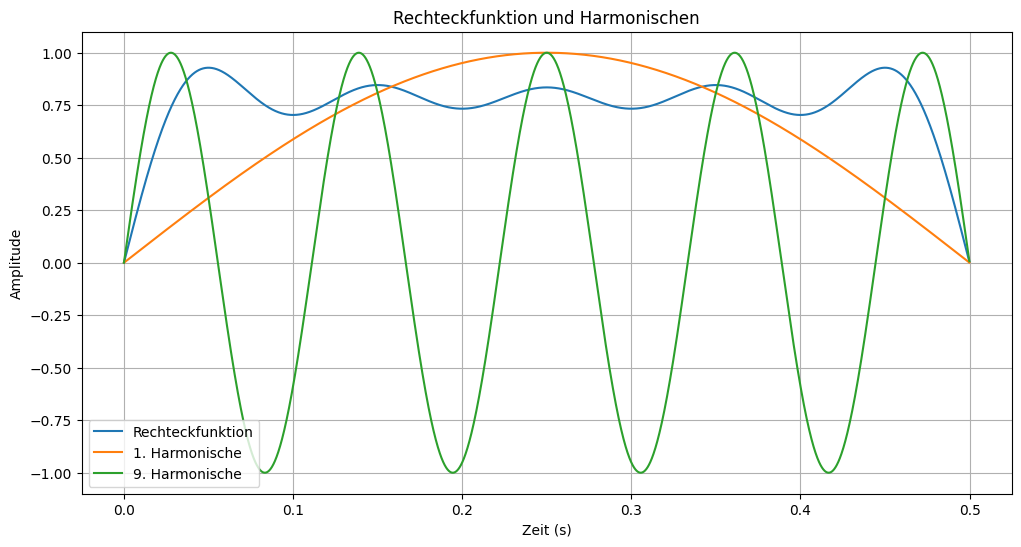

Klang der Rechtecksfunktion 


Klang der 1.Harmonischen 


Klang der 9.Harmonischen 


In [1787]:
# Parameter
f0 = 1  # Grundfrequenz in Hz
width = 0.5  # Breite der Rechteckfunktion in Sekunden
fa = 8000  # Abtastfrequenz in Hz
num_harmonics = 9  # Anzahl der zu verwendenden harmonischen Komponenten

# Zeitvektor
t = np.linspace(0, width, int(width * fa), endpoint=False)

# Fourier-Reihe der Rechteckfunktion mit ungeraden Harmonischen
rectangular_wave = np.zeros_like(t)
for n in range(1, num_harmonics + 1, 2):
    rectangular_wave += (1 / n) * np.sin(2 * np.pi * n * f0 * t)
    
# 1. Harmonische
first_harmonic = np.sin(2 * np.pi * f0 * t)

# 9. Harmonische
ninth_harmonic = np.sin(2 * np.pi * 9 * f0 * t)

# Plot der Rechteckfunktion und der Harmonischen
plt.figure(figsize=(12, 6))
plt.plot(t, rectangular_wave, label='Rechteckfunktion')
plt.plot(t, first_harmonic, label='1. Harmonische')
plt.plot(t, ninth_harmonic, label='9. Harmonische')
plt.title('Rechteckfunktion und Harmonischen')
plt.xlabel('Zeit (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()
    
# Abspielen der Rechtecksfunktion  
print("Klang der Rechtecksfunktion ")
ipd.display(ipd.Audio(rectangular_wave, rate=fa))

# Abspielen der 1.Harmonischen 
print("Klang der 1.Harmonischen ")
ipd.display(ipd.Audio(first_harmonic, rate=fa))

# Abspielen der 9.Harmonischen 
print("Klang der 9.Harmonischen ")
ipd.display(ipd.Audio(ninth_harmonic, rate=fa))

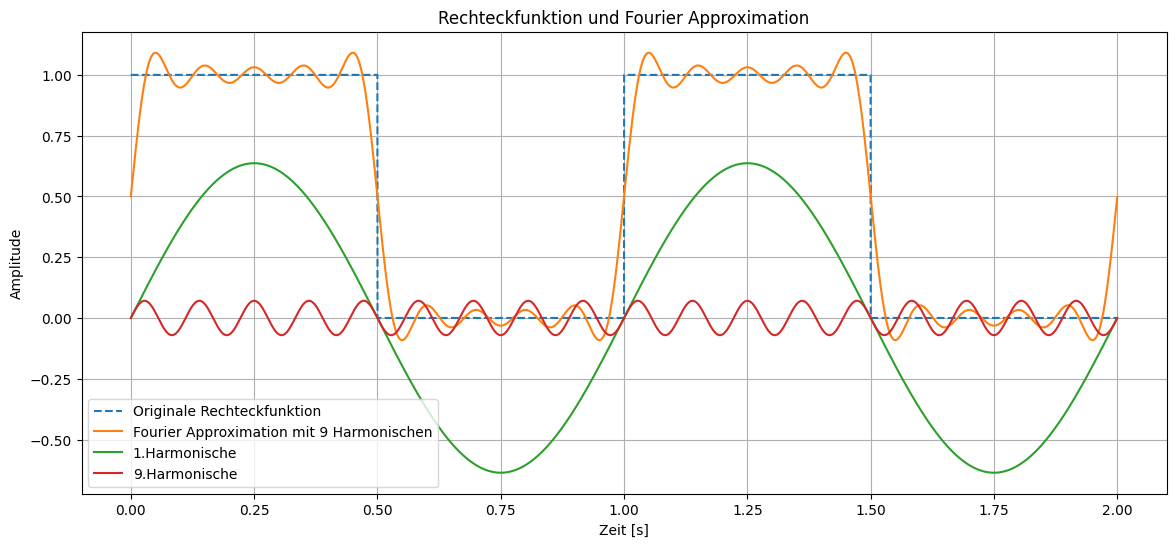

In [1788]:

# Parameter
f0 = 1  # Grundfrequenz in Hz
T0 = 1 / f0  # Periodendauer in Sekunden
breite = 0.5  # Breite des Rechteckimpulses in Sekunden
fa = 8000  # Abtastfrequenz in Hz
t = np.arange(0, 2*T0, 1/fa)  # Zeitvektor über zwei Perioden

# Rechteckfunktion erzeugen
rect = np.zeros_like(t)
rect[(t % T0) < breite] = 1

# Fourier-Koeffizienten und Überlagerung der harmonischen Komponenten
def fourier_rechteck(t, f0, N):
    result = 0.5  # DC-Komponente
    for k in range(1, N+1):
        if k % 2 != 0:  # Nur ungerade harmonische Komponenten
            result += (2 / (k * np.pi)) * np.sin(2 * np.pi * k * f0 * t)
    return result

# 1. und 9. harmonische Komponente
def harmonische_komponente(t, f0, k):
    return (2 / (k * np.pi)) * np.sin(2 * np.pi * k * f0 * t)

# Generierung der Rechteckfunktion durch Überlagerung der ersten 9 harmonischen Komponenten
rect_approx = fourier_rechteck(t, f0, N)
harmonic_1 = harmonische_komponente(t, f0, 1)
harmonic_9 = harmonische_komponente(t, f0, 9)

# Plotten der Ergebnisse
plt.figure(figsize=(14, 6))
plt.plot(t, rect, label='Originale Rechteckfunktion', linestyle='--')
plt.plot(t, rect_approx, label='Fourier Approximation mit 9 Harmonischen')
plt.plot(t, harmonic_1, label='1.Harmonische')
plt.plot(t, harmonic_9, label='9.Harmonische')
plt.xlabel('Zeit [s]')
plt.ylabel('Amplitude')
plt.title('Rechteckfunktion und Fourier Approximation')
plt.legend()
plt.grid()
plt.show()


#### Analyse 
Zusammenhang der Funktionen ? 

## Wie klingt eine periodische Rechteckfunktion mit 𝑓0 =440Hz? 

- Vergleichen Sie den Klang mit einem reinen sinus-Ton 𝑓0 =440Hz?

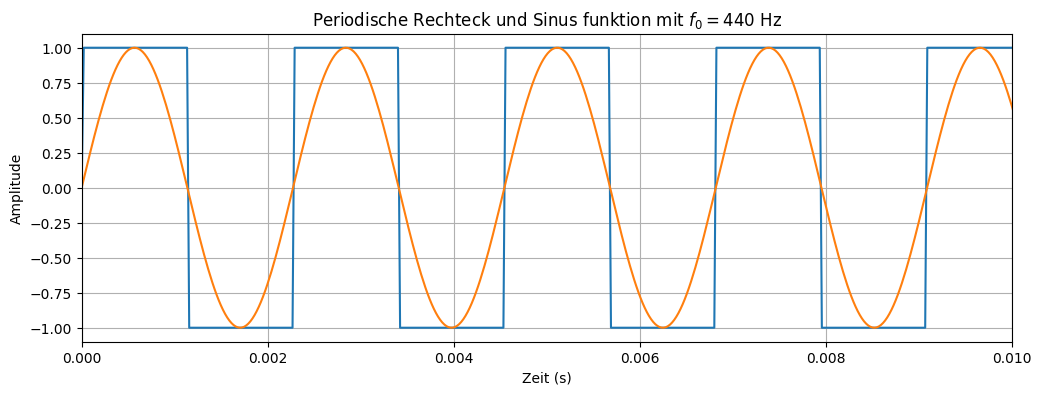

Klang der periodischen Rechteckfunktion:


Klang des reinen Sinustons:


In [1789]:

# Parameter
f0 = 440  # Grundfrequenz in Hz
duration = 2  # Dauer des Tons in Sekunden
sampling_rate = 44100  # Abtastrate in Hz

# Zeitvektor
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# Sinusfunktion
sin_wave =  np.sin(2 * np.pi * f0 * t)

# Rechteckfunktion
square_wave = np.sign(np.sin(2 * np.pi * f0 * t))

# Plot der Rechteckfunktion
plt.figure(figsize=(12, 4))
plt.plot(t, square_wave)
plt.plot(t, sin_wave)
plt.xlim(0,0.01)
plt.title('Periodische Rechteck und Sinus funktion mit $f_0 = 440$ Hz')
plt.xlabel('Zeit (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Abspielen der periodischen Rechteckfunktion
print("Klang der periodischen Rechteckfunktion:")
ipd.display(ipd.Audio(square_wave, rate=sampling_rate))

# Abspielen des reinen Sinustons
print("Klang des reinen Sinustons:")
ipd.display(ipd.Audio(sin_wave, rate=sampling_rate))

#### Analyse 
Man kann Deutlich hören das die Rechtecksfunktion Lauter und Schärfer ist im gegensatz zum eher Leisen und Sampften Sinusfunktion 